<a href="https://colab.research.google.com/github/ssharanyab/Rice-Classification/blob/main/Rice_Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, plot_roc_curve, confusion_matrix,precision_recall_fscore_support

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('Rice_Osmancik_Cammeo_Dataset.csv')
df.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [3]:
df.corr()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
AREA,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
PERIMETER,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
MAJORAXIS,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
MINORAXIS,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
ECCENTRICITY,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
CONVEX_AREA,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
EXTENT,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


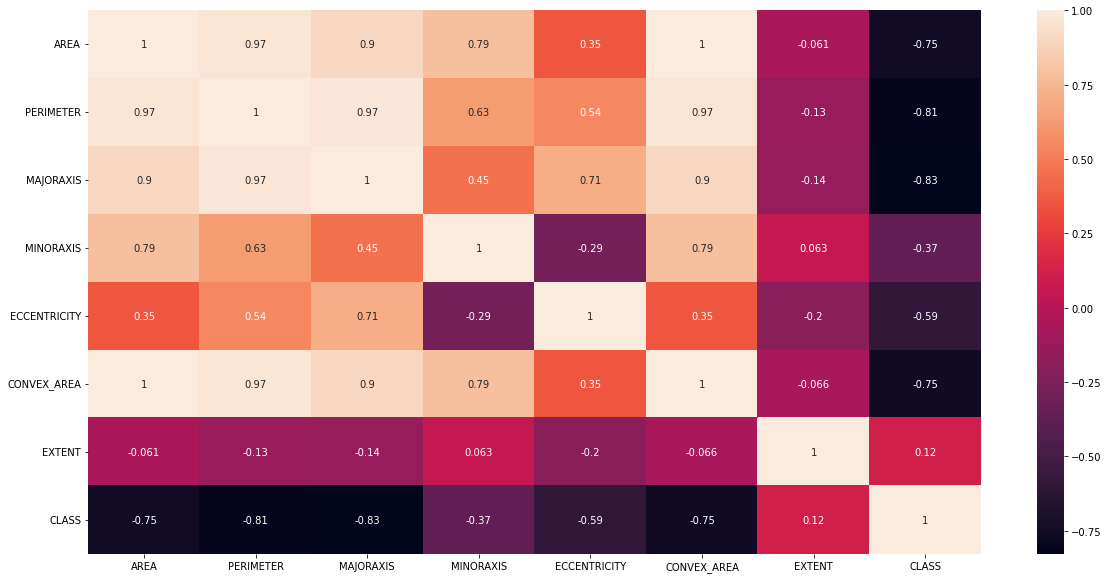

In [6]:
df['CLASS'].replace('Cammeo', 0,inplace=True)
df['CLASS'].replace('Osmancik', 1,inplace=True)


plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.drop(labels=['CONVEX_AREA', 'PERIMETER', 'MAJORAXIS', 'MINORAXIS'], axis=1, inplace=True)

df.head()

,AREA,ECCENTRICITY,EXTENT,CLASS
0,15231,0.928882,0.572896,0
1,14656,0.895405,0.615436,0
2,14634,0.912118,0.693259,0
3,13176,0.891861,0.640669,0
4,14688,0.906691,0.646024,0


In [8]:
df.isnull().sum()


AREA            0
ECCENTRICITY    0
EXTENT          0
CLASS           0
dtype: int64

In [9]:
df.shape

(3810, 4)

In [10]:
X=df.iloc[:, :-1]
X.head()

,AREA,ECCENTRICITY,EXTENT
0,15231,0.928882,0.572896
1,14656,0.895405,0.615436
2,14634,0.912118,0.693259
3,13176,0.891861,0.640669
4,14688,0.906691,0.646024


In [11]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

rice_encoder = LabelEncoder()
y = rice_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
from sklearn.svm import SVC
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred).ravel())

Accuracy Score:
0.9225721784776902
Confusion matrix:
[316  38  21 387]


In [15]:

cr = classification_report(y_test,y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       354
           1       0.91      0.95      0.93       408

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,8)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [17]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Predict
    y_pred = knn.predict(X_test)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

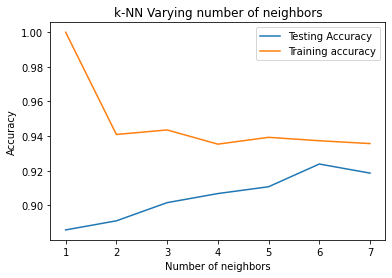

In [18]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [19]:
print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred).ravel())
cr = classification_report(y_test,y_pred)
print(cr)                                                  

Accuracy Score:
0.9186351706036745
Confusion matrix:
[313  41  21 387]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       354
           1       0.90      0.95      0.93       408

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762

